# Summary & Tips

> 2.2.7 장에 해당하는 코드

## Batch & Mini Batch

### 데이터셋 & 데이터로더

In [1]:
# 코드 2-21

import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, data_path):
        # 데이터를 불러오는 작업을 진행한다.
        import numpy as np
        with open(data_path, "r", encoding="utf-8") as file:
            data = file.read().splitlines()
            data = np.array([line.split("\t") for line in data], dtype=np.float)
        
        # data 는 1000개의 행, 4개의 열을 가지는 2차원 행렬이다.
        # 그중 입력 데이터는 3개의 피쳐을 가진 1000개의 데이터고, 
        # 마지막 열(1000x1)은 타겟 데이터다. 
        self.x = data[:, :-1]
        self.t = data[:, -1]
        
    def __getitem__(self, index):
        # index 에 해당하는 데이터를 가져온다
        return (self.x[index], self.t[index])
        
    def __len__(self):
        # 데이터의 총 크기(배치)
        return len(self.x)
    
    def custom_collate_fn(self, data):
        # __getitem__ 으로 가져온 data=(x, t)데이터를 전처리해준다.
        ## 여기서는 텐서로 전환한다.
        x, t = list(zip(*data))
        return (torch.FloatTensor(x), torch.LongTensor(t))

example_dataset_path = "./data/example_dataset.tsv"
# 데이터셋 선언
custom_dataset = CustomDataset(data_path=example_dataset_path)
# 데이터로더 선언
train_loader = DataLoader(dataset=custom_dataset,  # 선언한 데이터셋 입력
                          batch_size=64,  # 배치크기 입력
                          collate_fn=custom_dataset.custom_collate_fn,  # 데이터 전처리
                          shuffle=True)  # 셔플도 가능하다

# 테스트
for x, y in train_loader:
    print("size of mini-batch x: {}, t: {}".format(x.size(), y.size()))
    break

size of mini-batch x: torch.Size([64, 3]), t: torch.Size([64])


# 다양한 경사하강법 알고리즘

$f(x, y) = \dfrac{1}{20} x^2 + y^2$

In [2]:
# 필요한 패키지를 로드한다.
import numpy as np
import torch.nn as nn
import torch.optim as optim
from utils import draw_gradient_ani, draw_gradient_plot, optim_his_init, simulation
from matplotlib import rc
import matplotlib.pylab as plt
rc('animation', html='html5')

In [3]:
def loss_function(x, y):
    return (1/20)*(x**2) + (y**2)

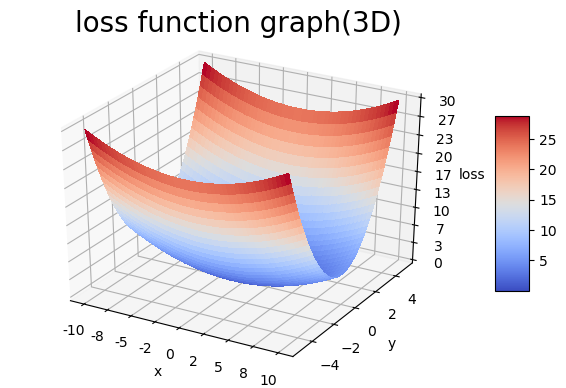

In [4]:
# 그림 2-58(좌)

# 레퍼런스: https://matplotlib.org/gallery/mplot3d/surface3d.html
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure(dpi=100)
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(-10, 10, 0.01)
y = np.arange(-5, 5, 0.01)
X, Y = np.meshgrid(x, y)
Z = loss_function(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the axises.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.00f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.00f'))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("loss")

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title("loss function graph(3D)", fontsize=20, y=1.05)
plt.tight_layout()
plt.show()

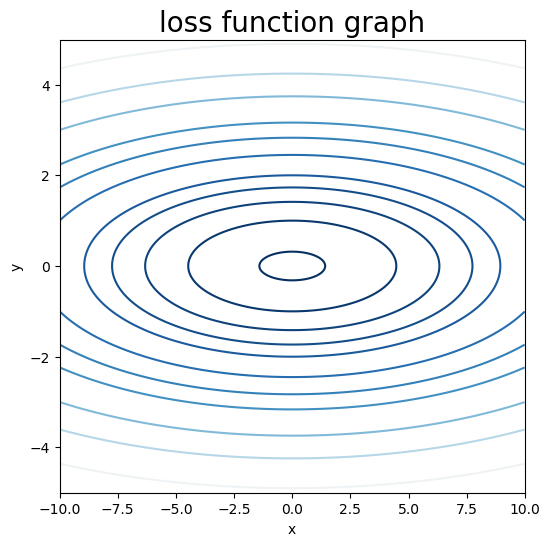

In [5]:
# 그림 2-58(우)

draw_gradient_plot(loss_function, his=None, title="loss function graph")

### SGD

실행이 안되는 경우 error:

```
RuntimeError: Requested MovieWriter (ffmpeg) not available
```

해결책: 

```
sudo apt install ffmpeg
```

In [6]:
# 그림 2-59

title="SGD(lr=0.9)"
n_step, interval = 30, 150
# 초기 매개변수: params=(x=-7.0, y=2.0) 와 기록을 위한 optim_his 변수를 선언한다.
optim_his, params = optim_his_init(-7.0, 2.0)
# SGD optimizer를 정의한다: 매개변수와 학습률을 설정한다.
optimizer = optim.SGD([v for v in params.values()], lr=0.9)
# 30 스텝동안 매개변수의 움직임을 시뮬레이션을 한다.
optim_his = simulation(loss_function, params, optimizer, optim_his, n_step)
draw_gradient_ani(loss_function, optim_his, n_step, interval, title)

In [7]:
# 그림 2-60

title="SGD(lr=0.1)"
n_step, interval = 30, 150
optim_his, params = optim_his_init(-7.0, 2.0)
optimizer = optim.SGD([v for v in params.values()], lr=0.1)
optim_his = simulation(loss_function, params, optimizer, optim_his, n_step)
draw_gradient_ani(loss_function, optim_his, n_step, interval, title)

### Momentum

In [8]:
# 그림 2-61

title = "Momentum(lr=0.1, momentum=0.9)"
n_step, interval = 30, 150
optim_his, params = optim_his_init(-7.0, 2.0)
optimizer = optim.SGD([v for v in params.values()], lr=0.1, momentum=0.9)
optim_his = simulation(loss_function, params, optimizer, optim_his, n_step)
draw_gradient_ani(loss_function, optim_his, n_step, interval, title)

### Adagrad

In [9]:
# 그림 2-62

title = "Adagrad(lr=1.5)"
n_step, interval = 30, 150
optim_his, params = optim_his_init(-7.0, 2.0)
optimizer = optim.Adagrad([v for v in params.values()], lr=1.5)
optim_his = simulation(loss_function, params, optimizer, optim_his, n_step)
draw_gradient_ani(loss_function, optim_his, n_step, interval, title)

### RMSProp

In [10]:
# 그림 2-63

title = "RMSProp(lr=0.3)"
n_step, interval = 30, 150
optim_his, params = optim_his_init(-7.0, 2.0)
optimizer = optim.RMSprop([v for v in params.values()], lr=0.3)
optim_his = simulation(loss_function, params, optimizer, optim_his, n_step)
draw_gradient_ani(loss_function, optim_his, n_step, interval, title)

### Adam

In [11]:
# 그림 2-64

title = "Adam(lr=0.3)"
n_step, interval = 30, 150
optim_his, params = optim_his_init(-7.0, 2.0)
optimizer = optim.Adam([v for v in params.values()], lr=0.3)
optim_his = simulation(loss_function, params, optimizer, optim_his, n_step)
draw_gradient_ani(loss_function, optim_his, n_step, interval, title)